# Plotting ancestor locations for some admixed samples

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import pandas as pd

In [4]:
def plot_genome_displacements_line(displacements, midpoints, chrcumsum, scale=1e-5, fname=None, axes_labels=True, plot_chromosome=False):

    # params
    cmap = plt.get_cmap('tab10')
    alpha = 0.1
    fontsize = 18
    ticklabelfontsize = 10

    # set up
    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot()

    # displacements along genome
    for i,mp in enumerate(midpoints): #midpoints along each chromosome
        for j,m in enumerate(mp): #particular midpoint
            ax1.arrow(
                (chrcumsum[i] + m) * scale, 0, #genomic location
                displacements[i,j,1], displacements[i,j,0], #displacement
                color = cmap(i), alpha = alpha, label='chromosome %d' %(i+1) #aesthetics
            )
            
    if plot_chromosome:
        ax1.plot([0, chrcumsum[-1]*scale],[0,0], color='k')

    # pretty-up
    ax1.tick_params(axis='both',labelsize=ticklabelfontsize)
    if axes_labels:
        ax1.set_ylabel('latitudinal displacement', fontsize=fontsize)
        ax1.set_xlabel('longitudinal displacement', fontsize=fontsize)
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')

    xmin, xmax = ax1.get_xlim()
    ymin, ymax = ax1.get_ylim()
    ypos = ymin + (ymax - ymin)/10
    start = xmax - 250
    end = xmax - 150
#     ax_h = ax1.bbox.transformed(fig.gca().transAxes).height
    ax1.plot([start, end], [ypos, ypos], color='k') #line 100 km long
#     ax1.text(start, ypos - ax_h, '100 km')
    
#     ax1.annotate('100 km', xy=(1, 0), xycoords='axes fraction', fontsize=16,
#             xytext=(-5, 5), textcoords='offset points',
#             ha='right', va='bottom')

    ax1.annotate('100 km', 
                 xy=(end, ypos), xycoords='data',
                 xytext=(-5, 5), textcoords='offset points',
                 fontsize=12,
                 ha='right', va='bottom',
#                 arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.tight_layout()
    if fname is not None:
        plt.savefig(fname, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [5]:
def plot_genome_displacements_center(displacements, midpoints, chrcumsum, scale=1e-5, fname=None):

    # params
    cmap = plt.get_cmap('viridis')
    alpha = 0.1
    fontsize = 18
    ticklabelfontsize = 10

    # set up
    fig = plt.figure(figsize=(10,10))
    ax1 = plt.subplot()

    # displacements along genome
    for i,mp in enumerate(midpoints): #midpoints along each chromosome
        for j,m in enumerate(mp): #particular midpoint
            ax1.arrow(
                0, 0, #genomic location (starting point)
                displacements[i,j,1], displacements[i,j,0], #displacement
                color = cmap((chrcumsum[i] + m)/chrcumsum[-1]), # color continuously based on linear genome
#                 color = cmap(i), #switch cmap to tab10 and color by chromosome
                alpha = alpha #aesthetics
            )

    # pretty-up
    ax1.tick_params(axis='both',labelsize=ticklabelfontsize)
    ax1.set_ylabel('latitudinal displacement', fontsize=fontsize)
    ax1.set_xlabel('longitudinal displacement', fontsize=fontsize)
#     ax1.set_xticklabels([])
#     ax1.set_yticklabels([])
    ax1.set_aspect('equal')

    ax1.plot([500,600], [-300,-300], color='k')
    ax1.text(500, -350, '100 km')

    plt.tight_layout()
    if fname is not None:
        plt.savefig(fname, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

In [6]:
def plot_genome_displacements_map(sample_locations, mle_locations,
                                  projection='cyl',
                                  lon_0='auto', lat_0='auto', 
                                  figsize=(10,12), height=1000,
                                  xlims='auto', ylims='auto',
                                  sample_alpha=1, sample_marker='o', sample_color='k', labels=None,
                                  arrows=True, arrow_alpha=0.1, arrow_width=1e4, color_arrows=True,
                                  colorbar=False, colorbartitle=None, pad = 0.025,
                                  fname=None, dpi=90, show=True):
    'function to plot displacements on maps'


    # set up figure
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(111, adjustable='box', aspect=1) #square
    
    if projection == 'nsper':
        
        if lon_0 == 'auto':
            lon_0 = np.mean(sample_locations[:,1])
        if lat_0 == 'auto':
            lat_0 = np.mean(sample_locations[:,0])

        bm1 = Basemap(projection=projection, #projection
                      lon_0=lon_0, lat_0=lat_0, #center point
                      satellite_height=height*1000., #height in meters
                      resolution='l') #low?
 
    if projection == 'cyl':
        
        if xlims == 'auto':
            xlims = [min(np.min(sample_locations[:,1]), np.nanmin(mle_locations[:,:,:,1])) - 1,
                     max(np.max(sample_locations[:,1]), np.nanmax(mle_locations[:,:,:,1])) + 1]
        if ylims == 'auto':
            ylims = [min(np.min(sample_locations[:,0]), np.nanmin(mle_locations[:,:,:,0])) - 1,
                     max(np.max(sample_locations[:,0]), np.nanmax(mle_locations[:,:,:,0])) + 1]        
        
        bm1 = Basemap(projection=projection, 
                      llcrnrlon=xlims[0], urcrnrlon=xlims[1], 
                      llcrnrlat=ylims[0], urcrnrlat=ylims[1], 
                      resolution='l')

    bm1.drawmapboundary(fill_color='lightsteelblue', zorder=0) #fill the globe with a blue color 
    bm1.fillcontinents(color='lightgray',lake_color='lightsteelblue', zorder=1) #continents gray, lakes blue
    bm1.drawcountries(color='gray', zorder=2) #country boundaries to help orient    
#     cmap = plt.get_cmap('viridis') #color map for mles
    cmap = plt.get_cmap('tab10') #color map for mles

    # loop over samples
    for s,sample_location in enumerate(sample_locations):
        
        # plot location of samples
        xi, yi = bm1(sample_location[1], sample_location[0]) #on the projection
        ax1.scatter(xi, yi, alpha=sample_alpha, marker=sample_marker, color=sample_color, zorder=7)
        ax1.annotate(labels[s], xy=(xi,yi), xycoords='data',
                     xytext=(0, 5), textcoords='offset points', ha='center',
                     zorder=8, color='white')

        # plot displacements
        xs, ys = bm1(mle_locations[s,:,:,1], mle_locations[s,:,:,0]) #long and lat for all chromosomes and loci
        for i,(x,y) in enumerate(zip(xs,ys)): #loop over chromosomes
            if color_arrows:
#                 arrow_color = cmap((chrcumsum[i])/chrcumsum[-1])
                arrow_color = cmap(i)
            else:
                arrow_color = 'k'
            for j,(xj,yj) in enumerate(zip(x,y)): #loop over loci
                if arrows:
                    ax1.arrow(xi, yi, xj-xi, yj-yi, color=arrow_color, alpha=arrow_alpha, width=arrow_width, overhang=0.25, head_width=5*arrow_width, length_includes_head=True, zorder=6) 
                else:
                    ax1.plot([xi, xj], [yi, yj], color=arrow_color, alpha=arrow_alpha, zorder=6)

#     # color bar
#     if colorbar:
#         cbar = fig.colorbar(cm.ScalarMappable(norm=None, cmap=cmap), ax=ax1, orientation='horizontal', shrink=0.75, pad=pad)
#         cbar.set_ticks([i/4 for i in range(5)])
#         if log_displacements:
#             cbar.set_ticklabels([round(np.exp(i*max(mean_displacements)/4)) for i in range(5)])
#         else:
#             cbar.set_ticklabels([round(i*max(mean_displacements)/4) for i in range(5)])
#         cbar.set_label(colorbartitle, fontsize=14)
#         cbar.ax.tick_params(labelsize=14)
        
    plt.tight_layout()

    if fname is not None:
        plt.savefig(fname, dpi=dpi, bbox_inches = 'tight', pad_inches = 0)

    if show:
        plt.show()
    else:
        plt.close()

In [7]:
def filter_samples(locations, group, clusters):

    if group == 'Eurasia':
        not_na = [i for i,j in enumerate(locations) if j[1]>-30] #not in NA (longitude greater than -30), and not missing (since the inequality is false when nan)
    elif group == 'Eurasia-no-Japan':
        not_na = [i for i,j in enumerate(locations) if j[1]>-30 and j[1]<120] #not NA, Japan, or nan
    else:
        print('error: group does not exist!')
        return

    # try to make clusters from pairwise differences  
    #remove = []
    #for cluster in clusters:
    #  remove.append(cluster[1:]) #remove all but first sample in each cluster (a bit of a rough approach)
    #remove = [i for j in remove for i in j] #flatten the list

    # just remove all samples
    remove = np.unique(clusters) #remove all samples that are in a nearly identical pair

    sample_ix = range(len(locations)+1) #index for all samples
    sample_ix_nonidentical = [i for i in sample_ix if i not in remove] #list of nonidentical sample idices
    keep = [i for i in sample_ix_nonidentical if i in not_na] #list of samples to keep

    return keep

parameters

In [8]:
datadir = '../data/'
chromosomes = range(1,6)
twoNe = 170000
u = 7e-09
numiter = 5
threshold = 0.5
nloci = 1000
dCutoff = 1000
tCutoff = 10000
loci = range(1000)
plotdir = '../plots/'
times = [10,100,1000]
group='Eurasia-no-Japan'
tsplits = [10,100,1000]
long_to_km = 110

data

In [9]:
locations = np.loadtxt(datadir+'1001G.locs') #locations of samples
clusters = np.load(datadir+'1001G_MAF0.05_dCutoff%d_clusters.npy' %dCutoff, allow_pickle=True) #clusters of nearly identical samples
keep = filter_samples(locations, group, clusters)

In [10]:
metadata = pd.read_csv(datadir+'1001G_metadata.csv', header=0)
admixture_group = np.array(metadata['admixed group'], dtype='str')
country = np.array(metadata['country'], dtype='str')
site = np.array(metadata['site'], dtype='str')
name = np.array(metadata['name'], dtype='str')
accession = np.array(metadata['accession'], dtype='str')

In [11]:
chr_lens = [30427671, 19698289, 23459830, 18585056, 26975502] #bp of each chromosome
chrcumsum = np.hstack([0,np.cumsum(chr_lens)]) #to place chromosomes next to each other

In [12]:
midpoints = []
for chromosome in chromosomes:
    # get tree indices we have mles for
    npz = np.load(datadir + '1001G' + '_chr%d_2Ne%d_u%s_popsize_numiter%d_threshold%.1f_nloci%d.npz' 
              %(chromosome,twoNe,u,numiter,threshold,nloci))
    which_loci = npz['which_trees']
    intervals = npz['intervals']
    midpoints.append([(i[1] + i[0])/2 for i in intervals])

# load ancestor locations

In [13]:
mles = []
for time in times:

    mle_locations = []
    for chromosome in chromosomes:
        mle_locations.append(np.load(datadir + '1001G_chr%d_2Ne%d_u%s_numiter%d_threshold%.1f_tCutoff%d_dCutoff%d_group%s_tsplits%s_time%d_displacements.npy' %(chromosome,twoNe,u,numiter,threshold,tCutoff,dCutoff,group,tsplits,time)))
        
    mles.append(mle_locations)
mles = np.array(mles)

# plot genome-view displacments for all admixed samples

In [12]:
ixs = [i for i,j in enumerate(keep) if admixture_group[j]=='Admixed']

France 4 2


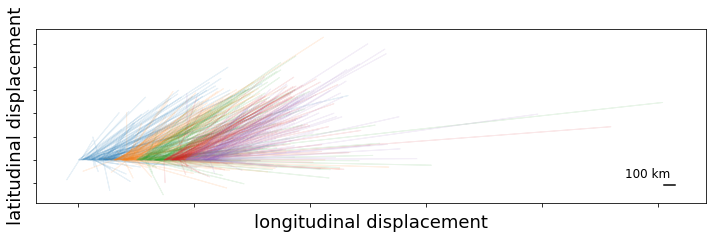

Sweden 55 29


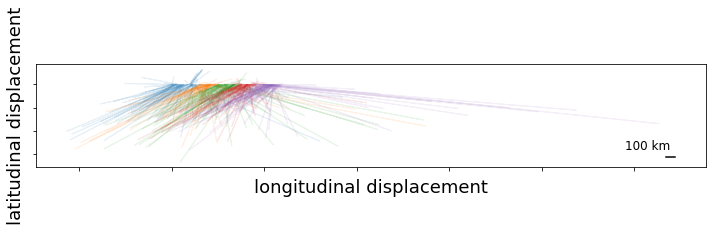

Sweden 56 30


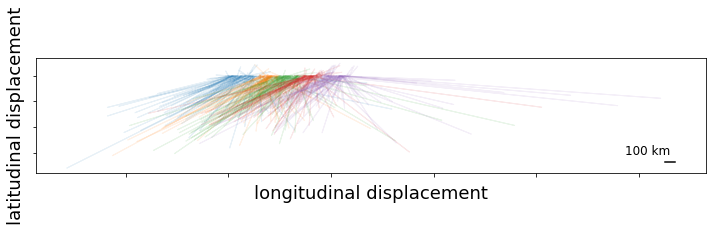

United Kingdom 120 40


United Kingdom 121 41


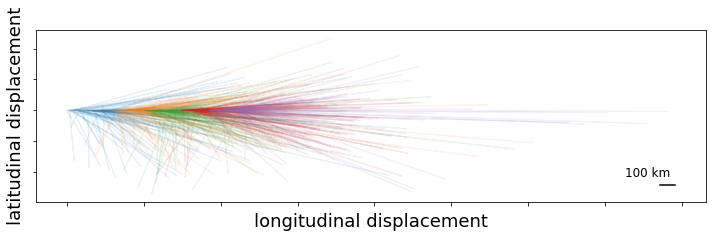

United Kingdom 142 52


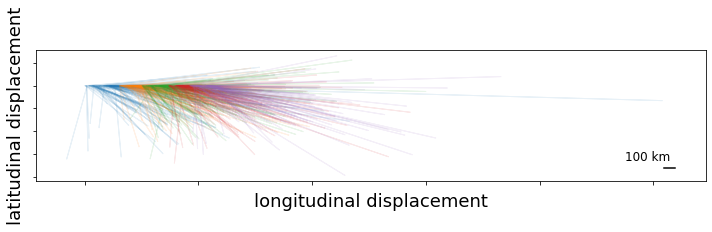

United Kingdom 143 53


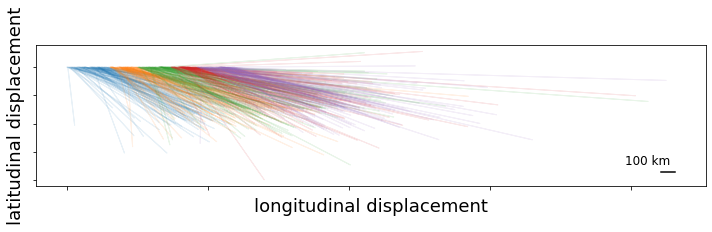

United Kingdom 146 55


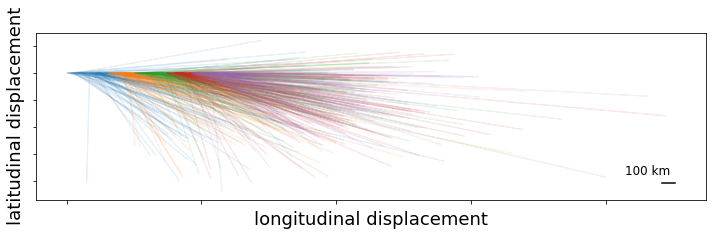

United Kingdom 149 57


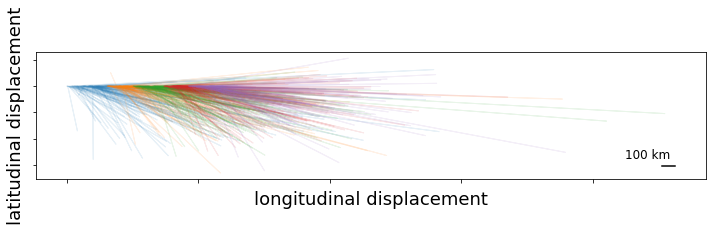

United Kingdom 150 58


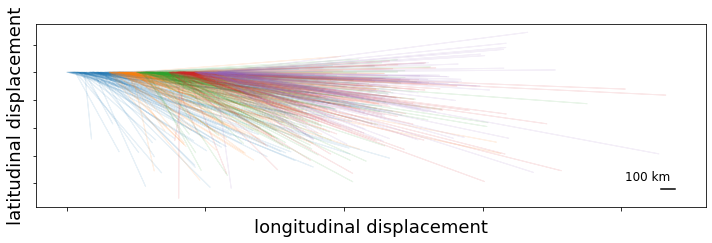

Sweden 188 96


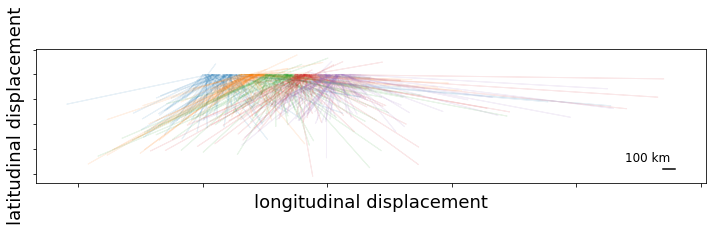

Sweden 191 99


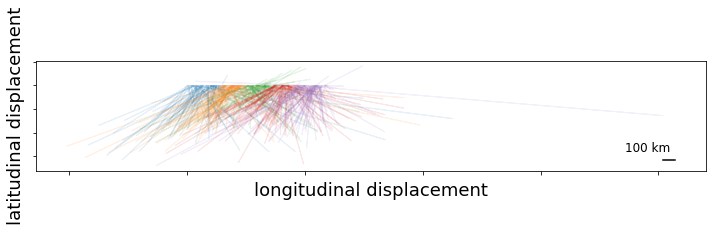

Sweden 203 109


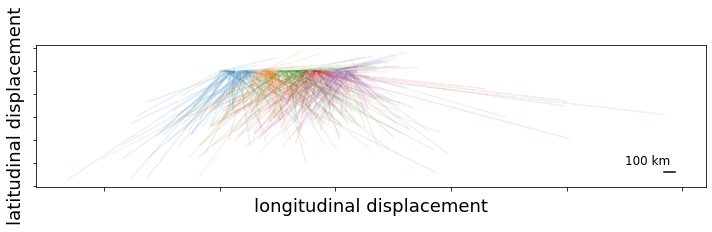

Sweden 293 199


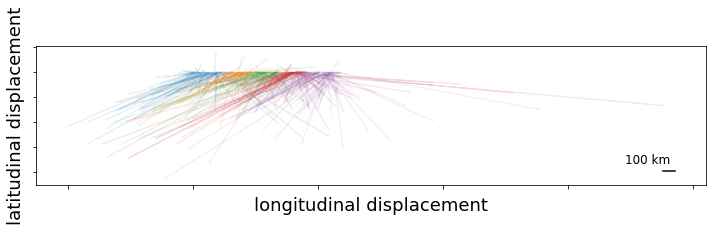

Kazakhstan 313 210


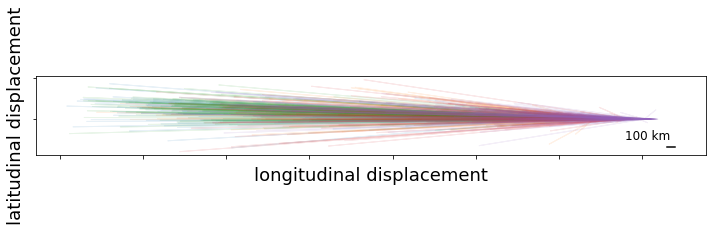

Belgium 315 212


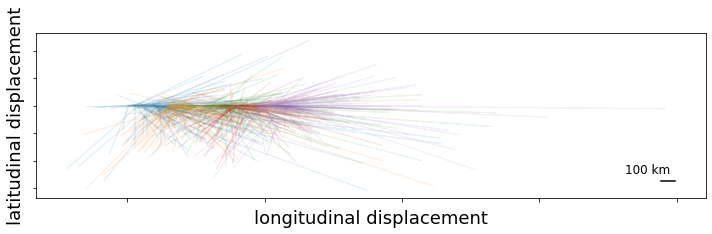

United Kingdom 320 215


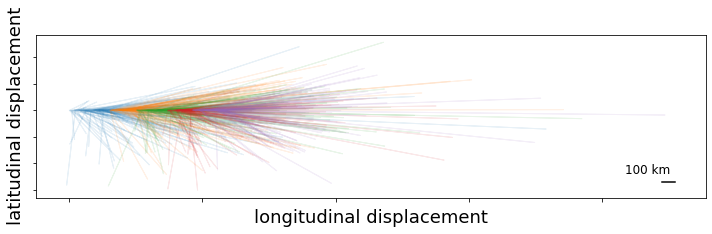

Russian Federation 363 249


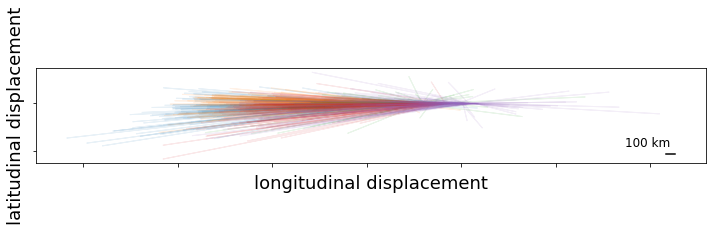

Germany 367 253


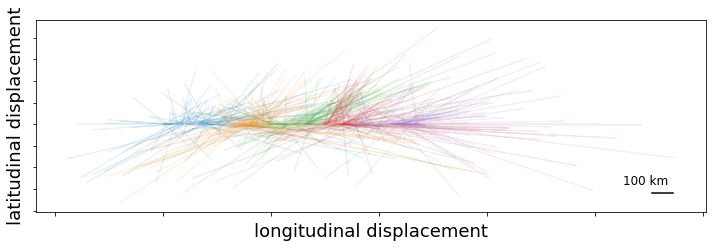

Netherlands 369 255


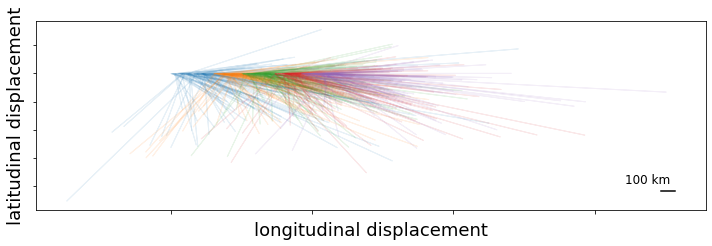

Belgium 370 256


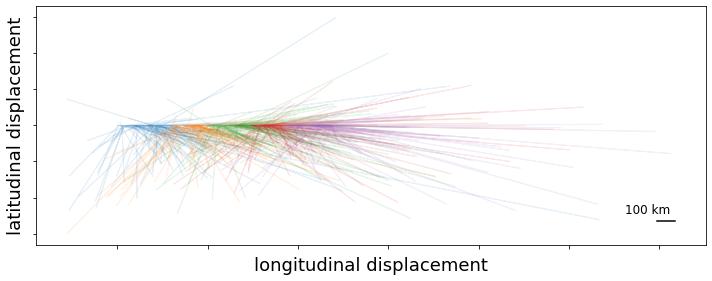

Switzerland 374 260


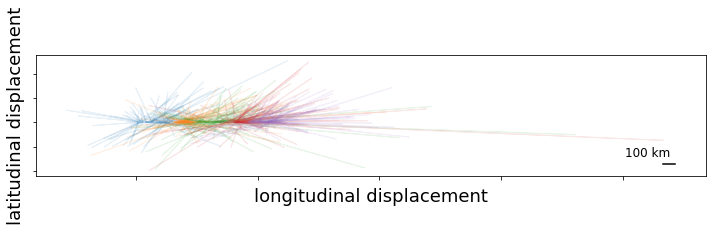

Germany 380 266


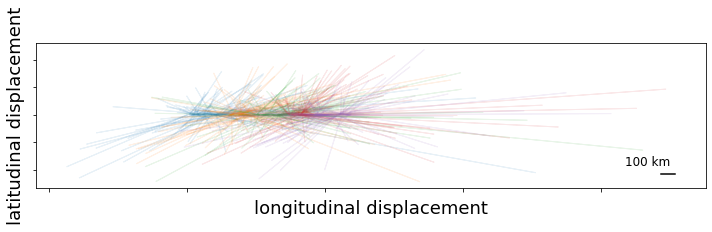

Russian Federation 392 273


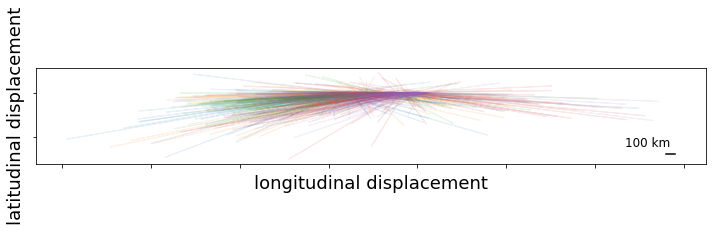

Finland 408 283


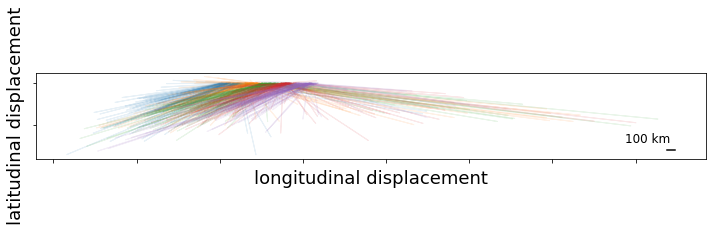

Estonia 409 284


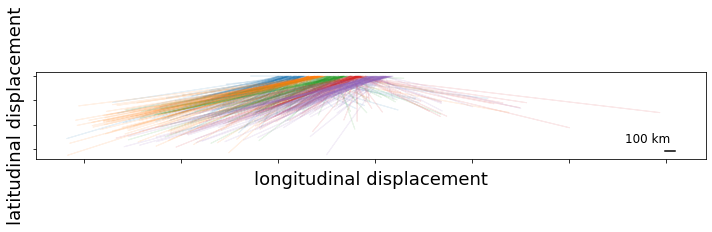

Germany 414 288


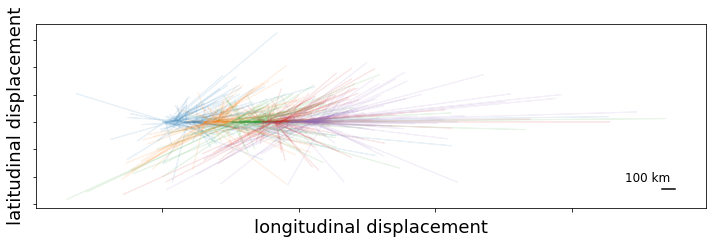

Germany 419 292


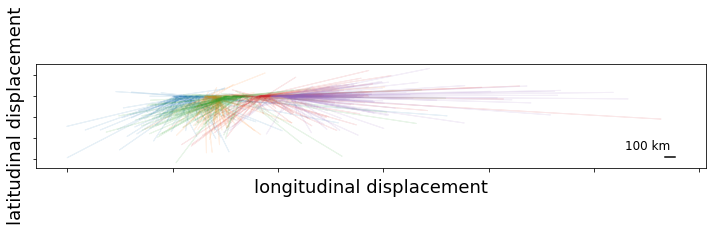

Germany 422 295


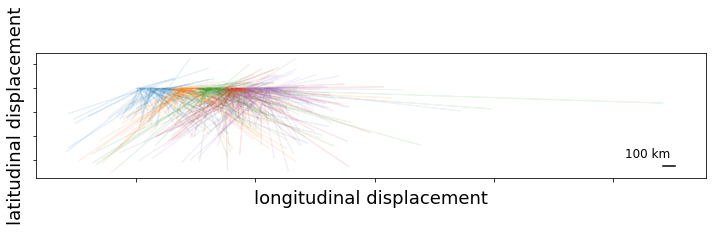

Germany 424 297


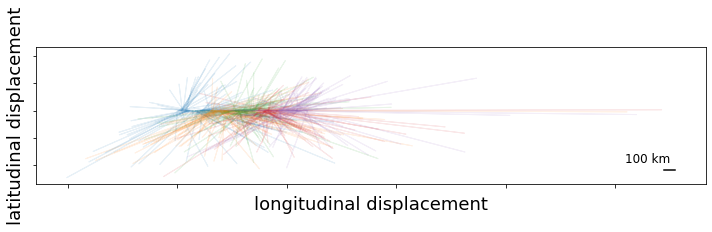

Poland 433 301


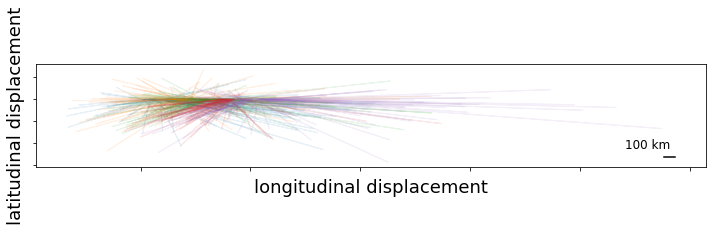

Netherlands 436 303


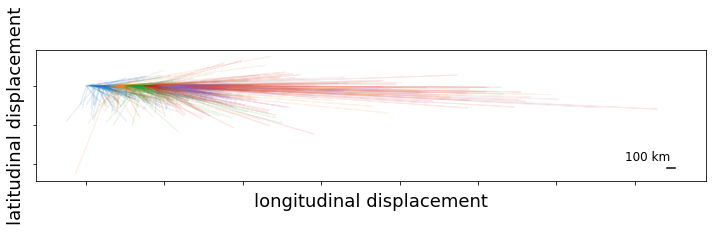

Germany 445 310


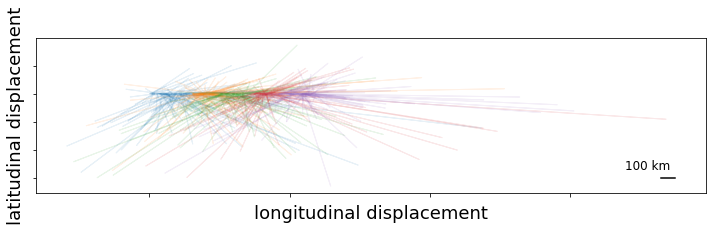

Germany 454 318


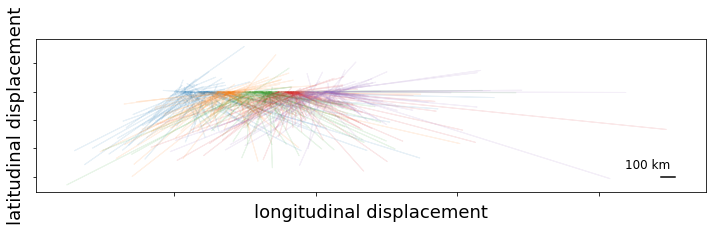

United Kingdom 457 320


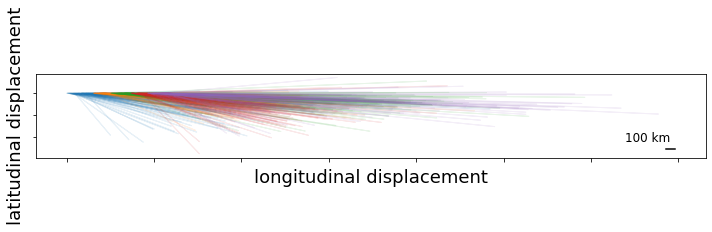

Netherlands 458 321


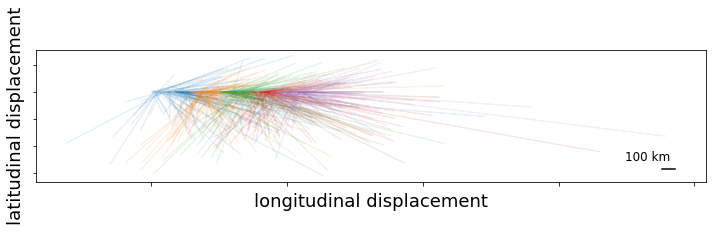

Italy 459 322


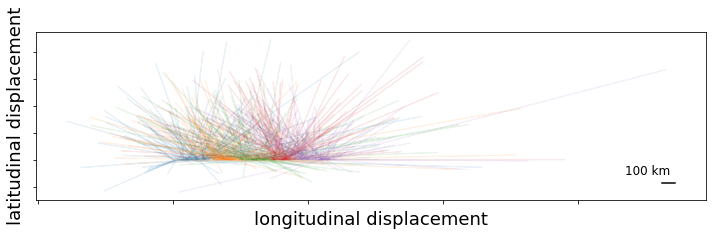

Germany 470 330


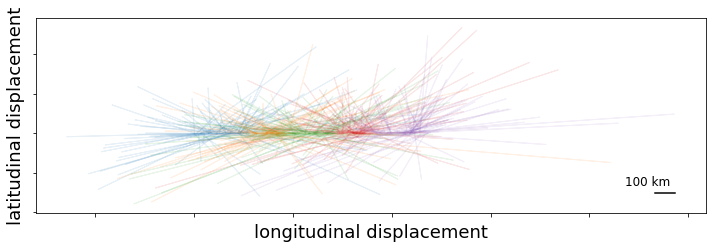

Netherlands 475 333


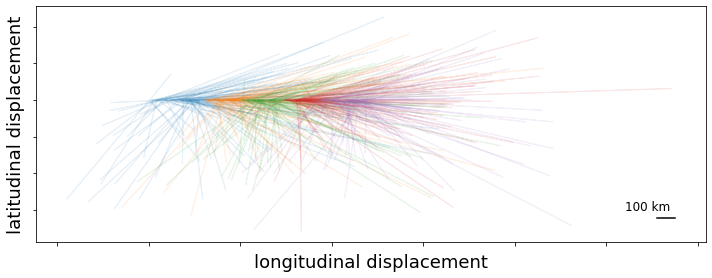

Germany 483 336


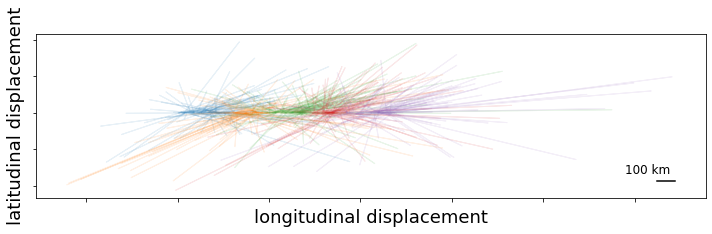

Netherlands 484 337


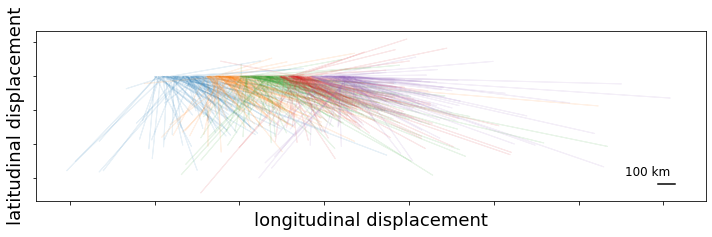

Netherlands 486 338


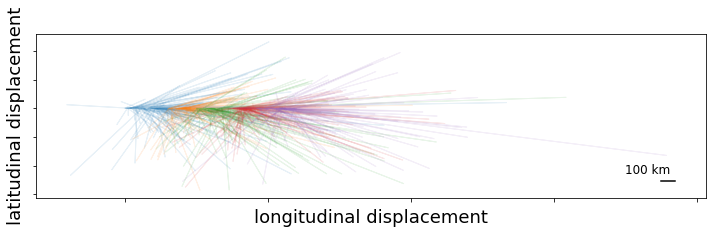

Poland 488 340


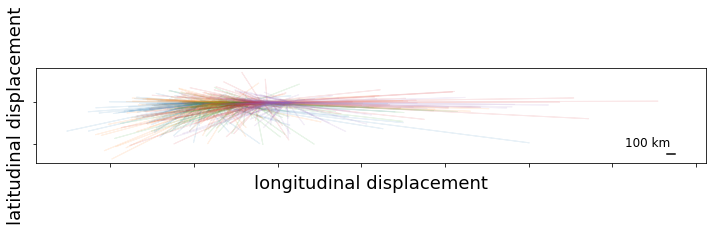

Germany 490 342


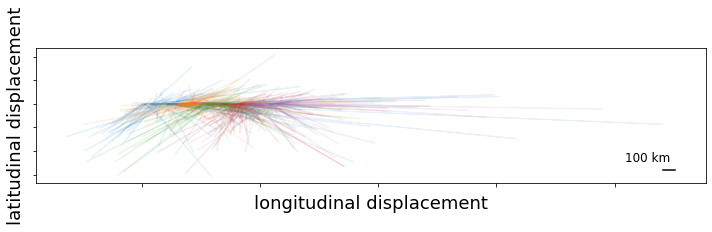

Switzerland 496 347


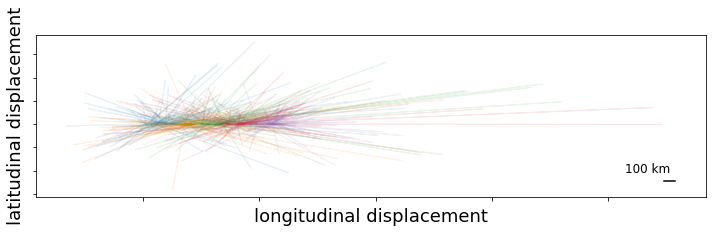

France 500 350


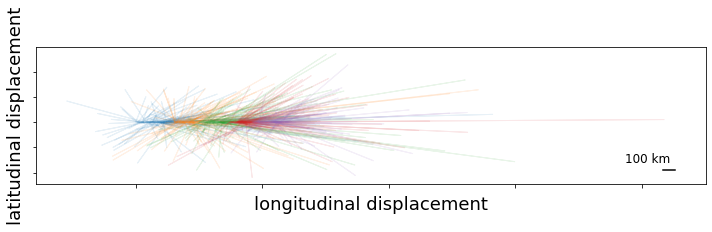

Sweden 548 373


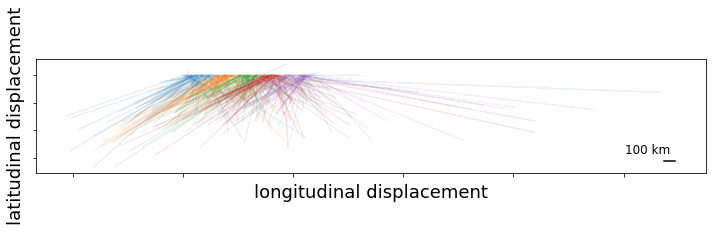

Sweden 562 383


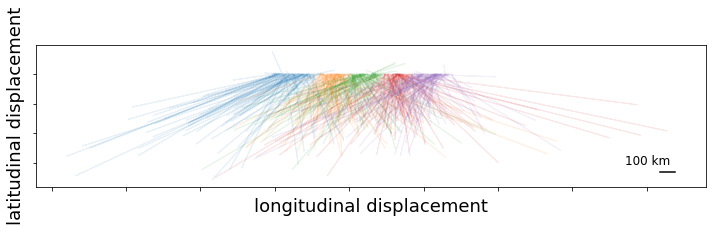

France 565 386


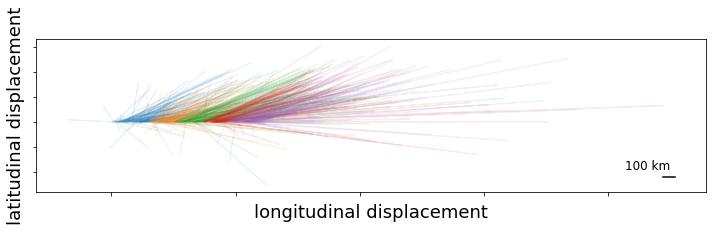

Germany 570 391


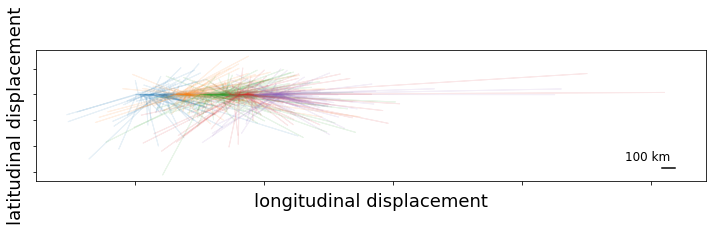

Sweden 587 402


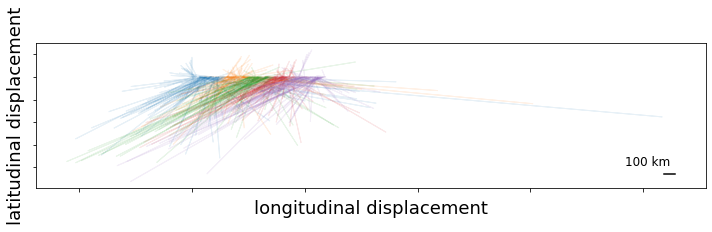

Sweden 624 425


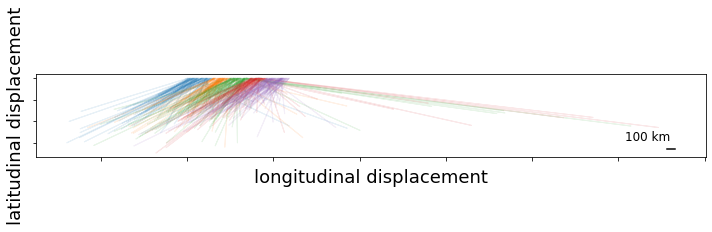

Sweden 626 427


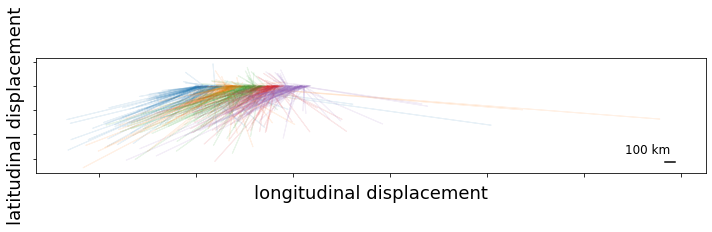

Sweden 634 435


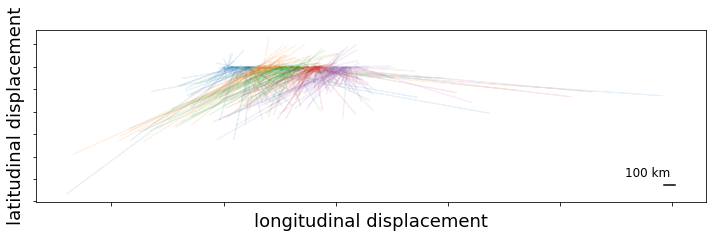

Sweden 635 436


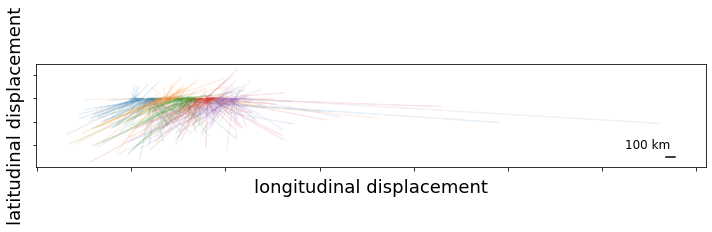

Sweden 636 437


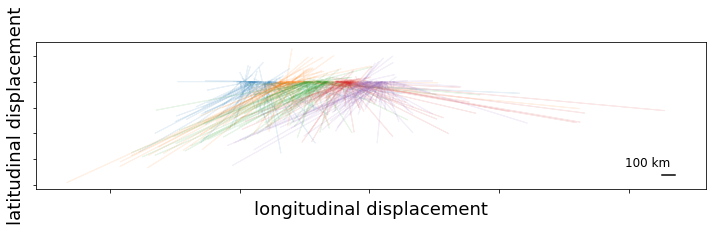

Sweden 642 443


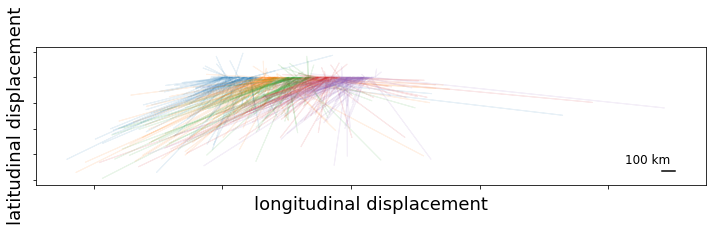

Portugal 671 472


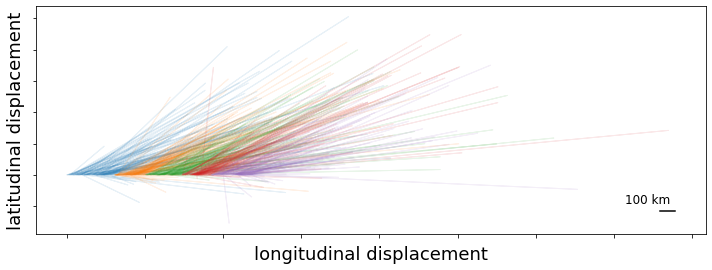

Portugal 673 474


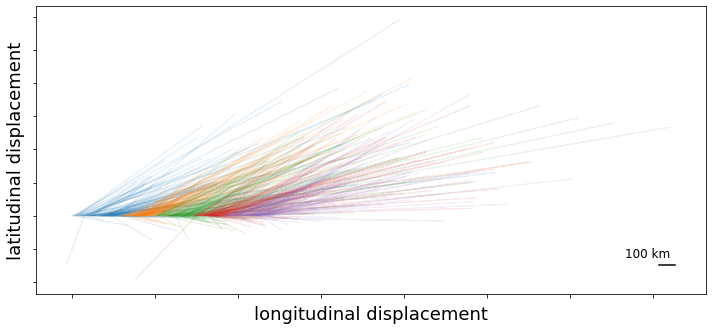

Spain 678 479


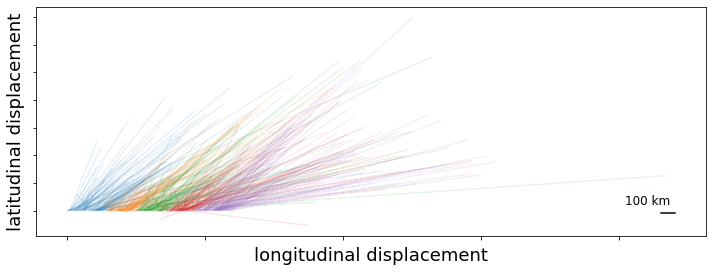

Spain 687 488


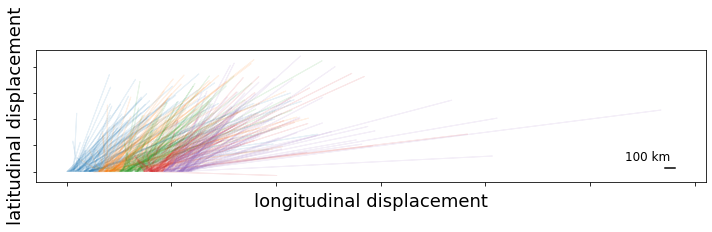

Spain 691 492


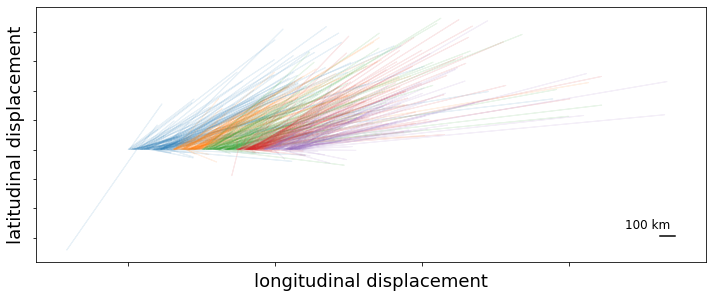

Spain 693 494


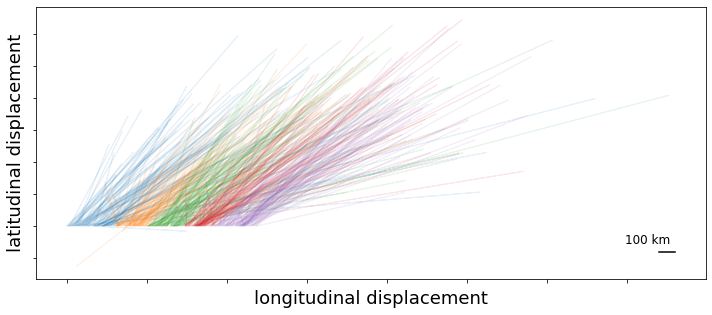

Spain 694 495


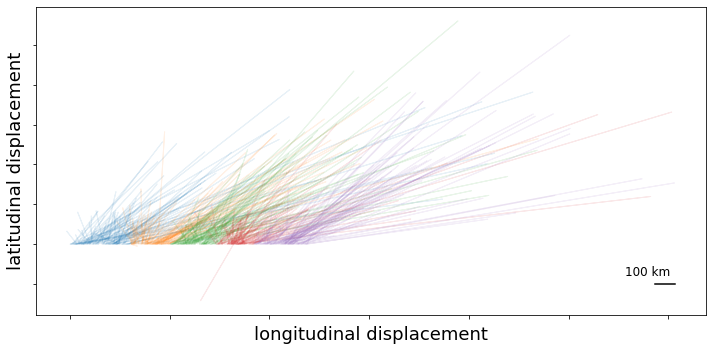

Spain 700 501


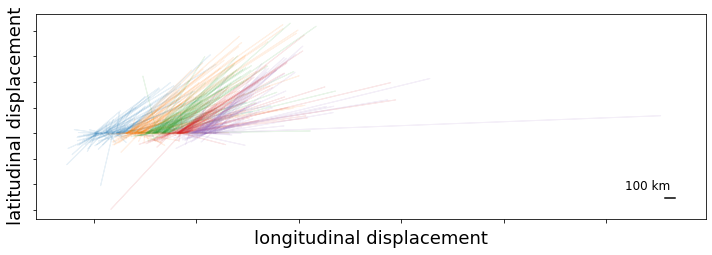

Spain 711 512


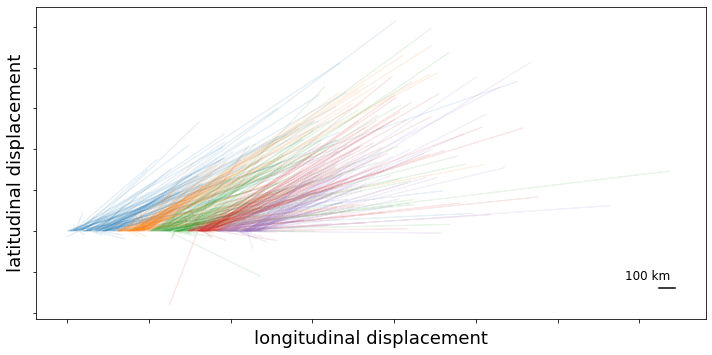

Spain 714 515


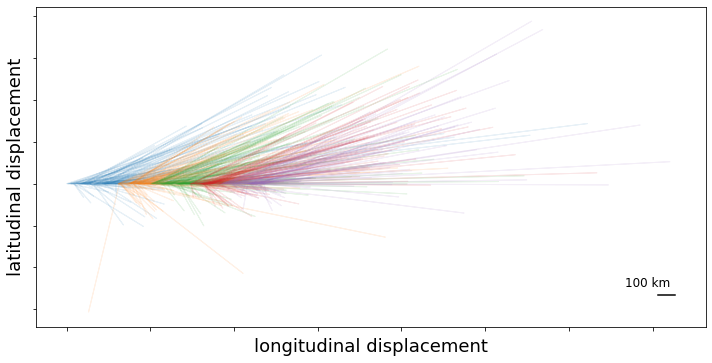

Spain 715 516


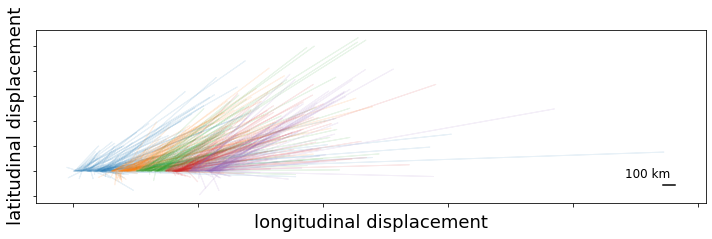

Spain 721 522


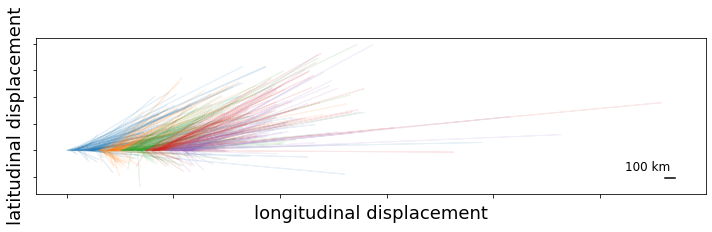

Spain 722 523


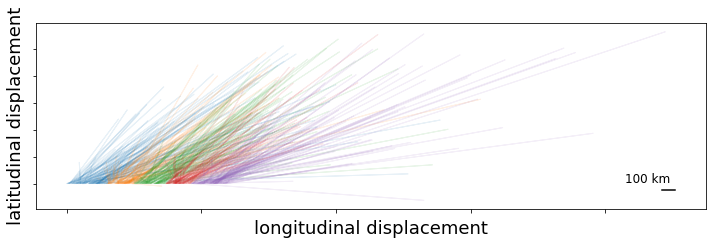

Spain 724 525


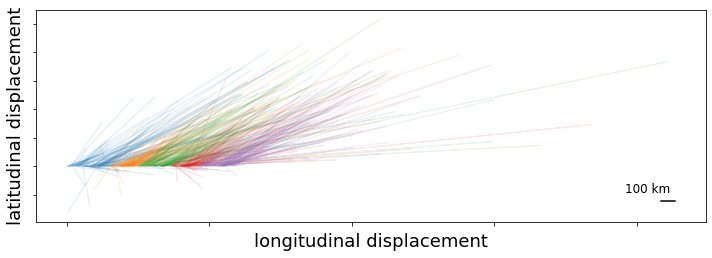

Spain 727 528


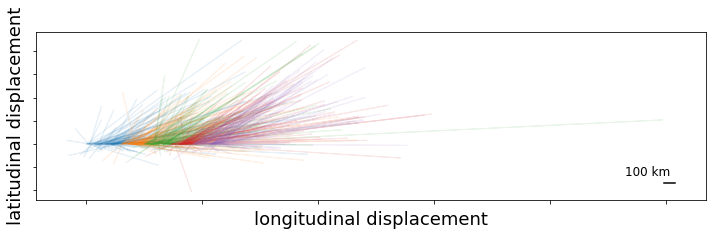

Spain 734 535


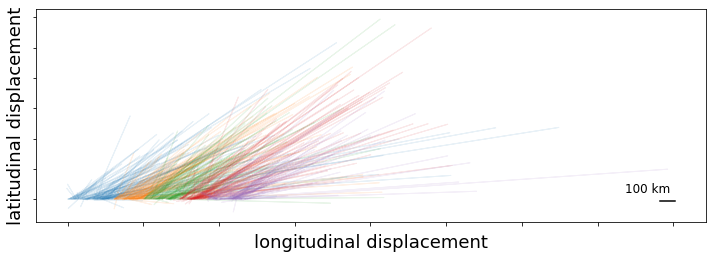

Spain 737 538


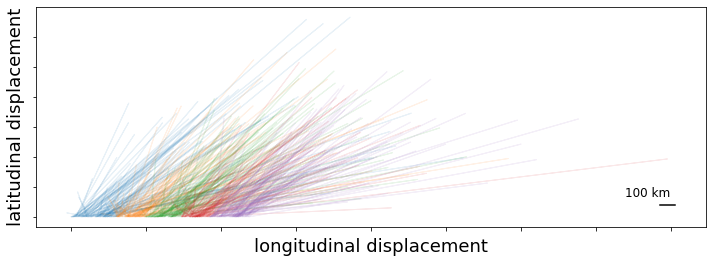

Spain 738 539


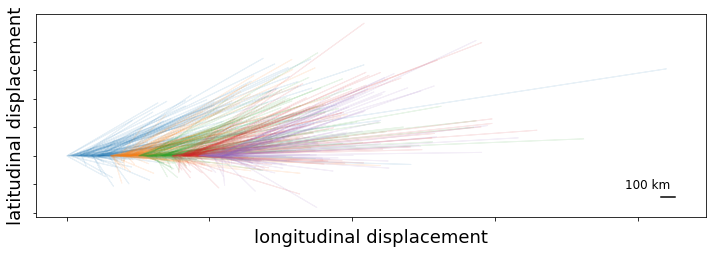

Spain 748 549


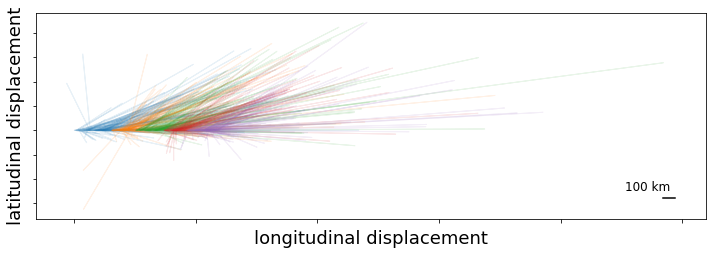

Spain 752 552


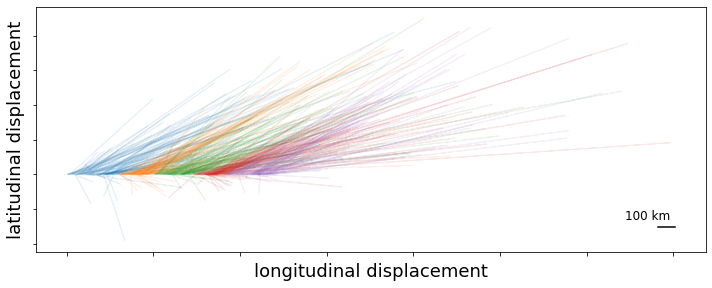

Spain 753 553


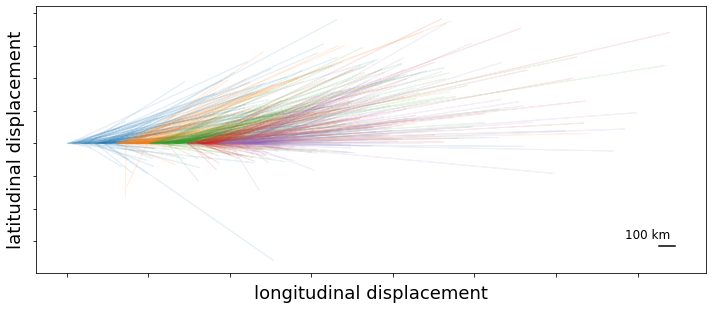

Russian Federation 774 573


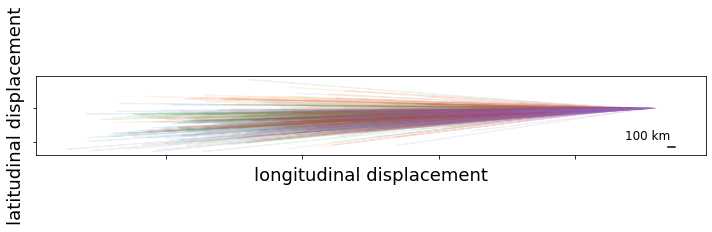

Italy 810 609


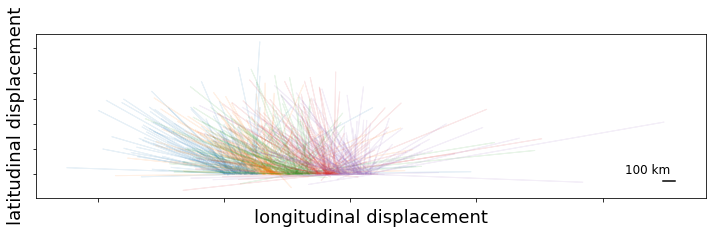

Italy 835 624


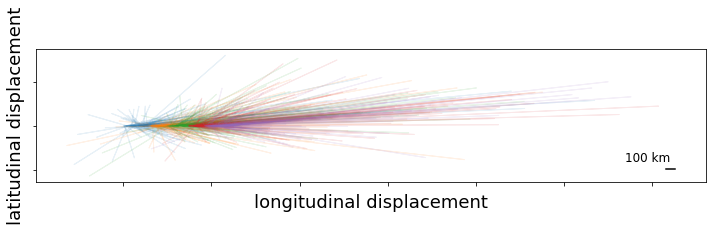

Romania 876 657


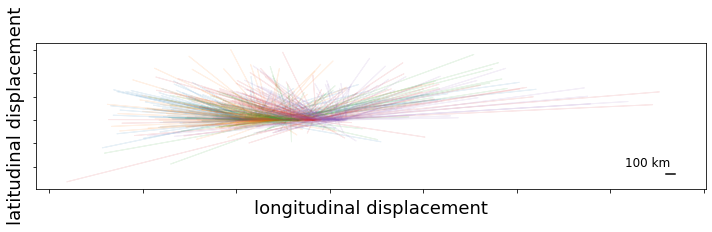

Romania 878 659


KeyboardInterrupt: 

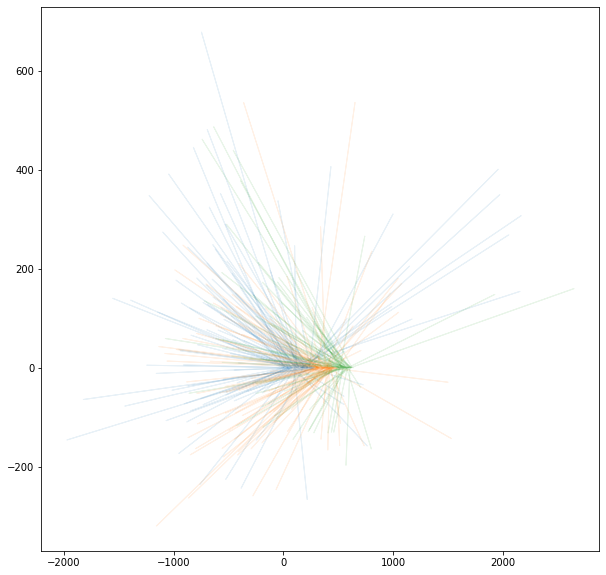

In [13]:
time_ix = 0 #what time to use

for individual_ix in ixs[:]:
    
    print(country[keep[individual_ix]], keep[individual_ix], individual_ix)

    # get displacements
    ix_mles = mles[time_ix,:,:,0,individual_ix] #mle locations across all loci and chromosomes
    
    for i,a in enumerate(ix_mles):
        for j,b in enumerate(a):
            if abs(b[0]) == 90 or abs(b[1]) == 180:
                ix_mles[i,j] = [np.nan, np.nan] 
            
    displacements = ix_mles - locations[keep[individual_ix]] #displacements

    # convert to kms
    start_lat = locations[keep[individual_ix]][0] #sample lat
    lat_to_km = np.cos(start_lat * math.pi/180)*111
    displacements[:,:,0] = displacements[:,:,0] * lat_to_km
    displacements[:,:,1] = displacements[:,:,1] * long_to_km

    # plot
    plot_genome_displacements_line(displacements, np.array(midpoints)[:,range(0,1000,10)], chrcumsum, fname=None)

# some of the more interesting admixed samples

In [14]:
time_ix = 0 #what time (index) to use
times[time_ix]

10

In [15]:
# ixs = [337,409,433,565,1013] #node indices for old analysis
# ixs = [210, 283, 340, 573, 662, 817, 862] #indices in keep for new analysis
ixs = [210, 283, 340, 662, 817, 862]
metadata.iloc[[keep[ix] for ix in ixs]]

accession      name CS number country code  latitude  longitude  \
313        6830     Kz-13   CS76994          KAZ   49.5000    73.1000   
408        7126      Es-0   CS76484          FIN   60.1997    24.5682   
488        7394      Wa-1   CS76626          POL   52.3000    21.0000   
881        9743   Furni-1   CS76873          ROU   45.1400    25.0000   
1044       9933    VED-10   CS78839          FRA   43.7400     3.8900   
1095       9993  Nemrut-1   CS76398          TUR   38.6425    42.2394   

             collector    seq by continent     country admixed group  \
313   Ihsan Al-Shehbaz       MPI      Asia  Kazakhstan       Admixed   
408       Albert Kranz      Salk    Europe     Finland       Admixed   
488       Albert Kranz      Salk    Europe      Poland       Admixed   
881                  0  Monsanto    Europe     Romania       Admixed   
1044                 0  Monsanto    Europe      France       Admixed   
1095        James Beck       MPI      Asia      Turkey       Admixed   

                 site  GTM axis 1  GTM axis 2  t-SNE axis 1  t-SNE axis 2  \
313                KZ   -0.999987   -0.499475     -2.997983     -3.300787   
408                Es    0.471786    0.444796      0.034983     12.528051   
488                Wa   -0.959693   -0.455032    -34.164402      7.239618   
881               NaN   -0.911615   -0.478610    -31.313234      2.242754   
1044              NaN   -0.973932   -0.409107    -32.259727      3.949559   
1095  Nemrut Mountain   -0.848208   -0.553400    -31.537107      2.171306   

      Principal component 1  Principal component 2  
313              -22.383291              36.130489  
408              -17.370974              20.706108  
488              -20.551794              18.964372  
881              -17.314260              15.890538  
1044             -19.634776              32.767858  
1095             -21.564078              26.678852

In [16]:
ixs = [210, 283, 340, 662, 817, 862]
labels = accession[[keep[ix] for ix in ixs]]

Kazakhstan Admixed 313 210 6830


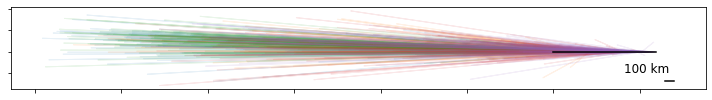

Finland Admixed 408 283 7126


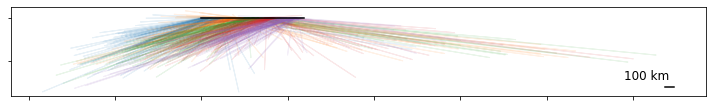

Poland Admixed 488 340 7394


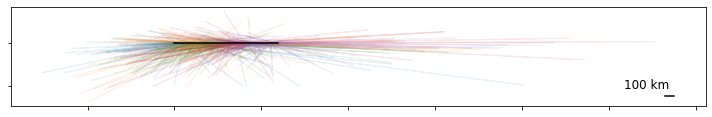

Romania Admixed 881 662 9743


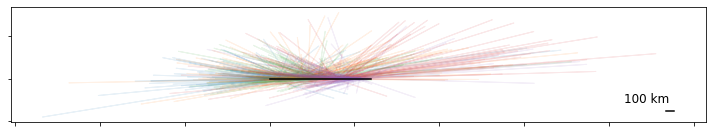

France Admixed 1044 817 9933


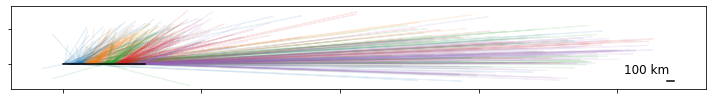

Turkey Admixed 1095 862 9993


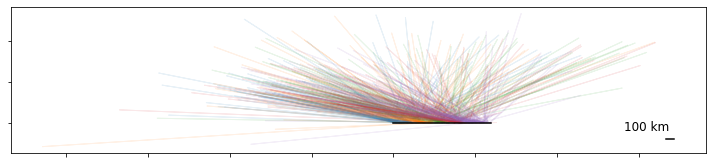

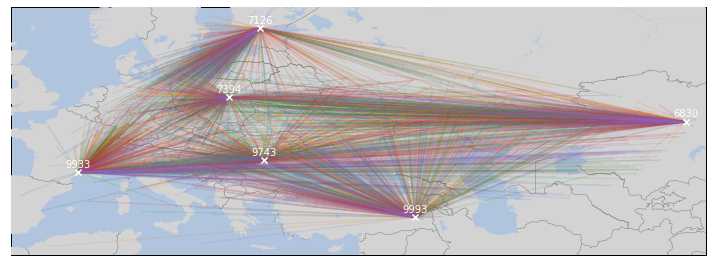

In [18]:
all_mles = []
for ix in ixs:
    
    print(country[keep[ix]], admixture_group[keep[ix]], keep[ix], ix, accession[keep[ix]])

    # get displacements
    ix_mles = mles[time_ix,:,:,0,ix] #mle locations across all loci and chromosomes
    
    # remove errors
    for i,a in enumerate(ix_mles):
        for j,b in enumerate(a):
            if abs(b[0]) == 90 or abs(b[1]) == 180:
                ix_mles[i,j] = [np.nan, np.nan] 
                
    displacements = ix_mles - locations[keep[ix]] #displacements

    # convert to kms
    start_lat = locations[keep[ix]][0] #sample lat
    lat_to_km = np.cos(start_lat * math.pi/180)*111
    displacements[:,:,0] = displacements[:,:,0] * lat_to_km
    displacements[:,:,1] = displacements[:,:,1] * long_to_km

    all_mles.append(ix_mles)
    
    # plot chromosome displacements
    fname = (plotdir + '1001G_genome-displacements_tsplits%s_node%d_time%d.pdf' %(tsplits,keep[ix],times[time_ix])).replace(' ','')    
#     fname = None
    plot_genome_displacements_line(displacements, np.array(midpoints)[:,range(0,1000,10)], chrcumsum,
                                       axes_labels=False, 
                                       plot_chromosome=True,
                                       fname=fname)
    
fname = (plotdir + '1001G_genome-displacements-admixed_tsplits%s_time%d.pdf' %(tsplits,times[time_ix])).replace(' ','')
# fname = None
plot_genome_displacements_map(sample_locations=locations[[keep[ix] for ix in ixs]], 
                              mle_locations=np.array(all_mles), 
                              sample_color='white', sample_marker="x", labels=labels,
                              arrow_alpha=0.1, arrow_width=0.03, color_arrows=True,
                              fname=fname)

# plot mean displacement per chromosome

In [12]:
time_ix = 0 #what time (index) to use
times[time_ix]

10

In [13]:
ixs = [210, 283, 340, 662, 817, 862]
labels = accession[[keep[ix] for ix in ixs]]

In [16]:
all_mles = []
for ix in ixs:
    
    print(country[keep[ix]], admixture_group[keep[ix]], keep[ix], ix, accession[keep[ix]])

    # get displacements
    ix_mles = mles[time_ix,:,:,0,ix] #mle locations across all loci and chromosomes
    
    # remove errors
    for i,a in enumerate(ix_mles):
        for j,b in enumerate(a):
            if abs(b[0]) == 90 or abs(b[1]) == 180:
                ix_mles[i,j] = [np.nan, np.nan] 
                
    displacements = ix_mles - locations[keep[ix]] #displacements

    # convert to kms
    start_lat = locations[keep[ix]][0] #sample lat
    lat_to_km = np.cos(start_lat * math.pi/180)*111
    displacements[:,:,0] = displacements[:,:,0] * lat_to_km
    displacements[:,:,1] = displacements[:,:,1] * long_to_km

    all_mles.append(ix_mles)

all_mles = np.array(all_mles)

Kazakhstan Admixed 313 210 6830
Finland Admixed 408 283 7126
Poland Admixed 488 340 7394
Romania Admixed 881 662 9743
France Admixed 1044 817 9933
Turkey Admixed 1095 862 9993


take the mean over loci and then add a dimension back on to work within the existing plot code (as if there is one locus per chromosome, but now that one locus represents the mean)

In [19]:
mles_by_chrom = np.nanmean(all_mles, axis=2).reshape((len(ixs), len(chromosomes), 1, 2))

In [20]:
mles_by_chrom[3]

array([[[46.09262881, 20.73069618]],

       [[47.14623775, 24.6727877 ]],

       [[46.75019206, 21.783484  ]],

       [[47.72234846, 27.51759226]],

       [[45.9351773 , 21.42673594]]])

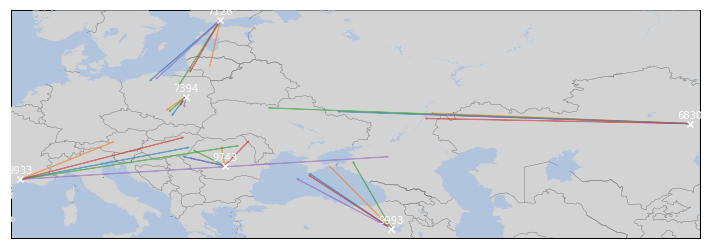

In [21]:
# fname = (plotdir + '1001G_genome-displacements-admixed_tsplits%s_time%d.pdf' %(tsplits,times[time_ix])).replace(' ','')
fname = None
plot_genome_displacements_map(sample_locations=locations[[keep[ix] for ix in ixs]], 
                              mle_locations=mles_by_chrom, 
                              sample_color='white', sample_marker="x", labels=labels,
                              arrow_alpha=0.5, arrow_width=0.03, color_arrows=True,
                              fname=fname)

# polar historgrams

adapted from https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/17-street-network-orientations.ipynb

In [14]:
def count_and_merge(n, bearings, weights=None):
    # make twice as many bins as desired, then merge them in pairs
    # prevents bin-edge effects around common values like 0° and 90°
    n = n * 2
    bins = np.arange(n + 1) * 360 / n
    count, _ = np.histogram(bearings, bins=bins, weights=weights, density=False)
    
    # move the last bin to the front, so eg 0.01° and 359.99° will be binned together
    count = np.roll(count, 1)
    return count[::2] + count[1::2]

# function to draw a stacked polar histogram for a set of edge bearings
def stacked_polar_plot(ax, all_bearings, n=36, title=None, colors=['#003366'], ymax=None, xticks=True, yticks=False, weights=None):

    bins = np.arange(n + 1) * 360 / n
    width =  2 * np.pi / n

    xs = []
    counts = []
    for i,bearings in enumerate(all_bearings):
    
        # xs
        _, division = np.histogram(bearings, bins=bins)
        division = division[0:-1]
        x = division * np.pi / 180
        xs.append(x)
    
        # counts
        weight = None
        mean_weight = 1
        if weights is not None:
            weight=weights[i]
            mean_weight = np.nanmean(weight)
        count = count_and_merge(n, bearings, weights=weight)
        counts.append(count)
        
    # frequencys (normalize over all chromosomes together)
    frequencys = counts / np.sum(counts)
            
    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')    
        
    bottom = [0] * n
    for i,(x,frequency) in enumerate(zip(xs, frequencys)):
        bars = ax.bar(x, height=frequency, bottom=bottom, color=colors(i), 
                  width=width, align='center', zorder=2, edgecolor='k', linewidth=0.5, alpha=0.7)
        bottom += frequency
    
    if ymax is None:
        ax.set_ylim(top=max(bottom))
    else:
        ax.set_ylim(top=ymax)
    
    if title is not None:
        title_font = {'family':'Century Gothic', 'size':24, 'weight':'bold'}
        ax.set_title(title.upper(), y=1.05, fontdict=title_font)
    
    ax.set_yticks(np.linspace(0, max(ax.get_ylim()), 5))
    yticklabels = []
    ytick_font = {'family':'Century Gothic', 'size': 9, 'weight':'bold', 'alpha':0.2, 'zorder':3}
    if yticks:
        yticklabels = ['{:.2f}'.format(y) for y in ax.get_yticks()]
        yticklabels[0] = ''
    ax.set_yticklabels(labels=yticklabels, fontdict=ytick_font)
    
    ax.tick_params(axis='x', which='major', pad=-2)
    xticklabels = []
    xtick_font = {'family':'Century Gothic', 'size':10, 'weight':'bold', 'alpha':1.0, 'zorder':3}
    if xticks:
        xticklabels = ['N', '', 'E', '', 'S', '', 'W', '']
    ax.set_xticklabels(labels=xticklabels, fontdict=xtick_font)

In [15]:
time_ix = 0 #what time (index) to use
times[time_ix]

10

In [16]:
ixs = [210, 283, 340, 662, 817, 862] #which samples to use
# ixs = [817] #testing
labels = accession[[keep[ix] for ix in ixs]]

get data

In [17]:
all_mles = []
for ix in ixs:
    
    print(country[keep[ix]], admixture_group[keep[ix]], keep[ix], ix, accession[keep[ix]])

    # get displacements
    ix_mles = mles[time_ix,:,:,0,ix] #mle locations across all loci and chromosomes
    
    # remove errors
    for i,a in enumerate(ix_mles):
        for j,b in enumerate(a):
            if abs(b[0]) == 90 or abs(b[1]) == 180:
                ix_mles[i,j] = [np.nan, np.nan] 
                
    displacements = ix_mles - locations[keep[ix]] #displacements

    # convert to kms
    start_lat = locations[keep[ix]][0] #sample lat
    lat_to_km = np.cos(start_lat * math.pi/180)*111
    displacements[:,:,0] = displacements[:,:,0] * lat_to_km
    displacements[:,:,1] = displacements[:,:,1] * long_to_km

    all_mles.append(ix_mles)

all_mles = np.array(all_mles)

Kazakhstan Admixed 313 210 6830
Finland Admixed 408 283 7126
Poland Admixed 488 340 7394
Romania Admixed 881 662 9743
France Admixed 1044 817 9933
Turkey Admixed 1095 862 9993


In [18]:
x0s = [locations[keep[ix]] for ix in ixs] #starting positions

convert to bearings (fwd, back, distance -- but only use fwd) 

In [19]:
import pyproj
geodesic = pyproj.Geod(ellps='WGS84')

a,b,c,_ = all_mles.shape
bearings = np.zeros((a,b,c,1))
distances = np.zeros((a,b,c,1))
for i,s in enumerate(all_mles):
    for j,c in enumerate(s):
        for k, (lat, long) in enumerate(c):
            az1,_,d = geodesic.inv(x0s[i][1], x0s[i][0], long, lat)
            if az1 < 0:
                az1 = 360 + az1
            bearings[i,j,k] = az1
            distances[i,j,k] = d

plot

In [20]:
# colors = plt.get_cmap('tab10')
# for i,s in enumerate(bearings):
    
#     ix = ixs[i]
#     print(country[keep[ix]], accession[keep[ix]])
    
#     fig, ax = plt.subplots(subplot_kw={'projection':'polar'})
#     stacked_polar_plot(ax, s, colors=colors, weights=distances[i])
#     plt.show()
# #     plt.close()

now overlay this on a map (see alternative here: https://windrose.readthedocs.io/en/latest/usage.html#overlay-of-a-map)

In [21]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

In [28]:
def plot_windrose_map(sample_locations,
                      figsize=(15,15), 
                      left_pad=2, right_pad=2, bottom_pad=2, top_pad=2,
                      xlims='auto', ylims='auto',
                      sample_alpha=1, sample_marker='o', sample_color='k', plot_samples=False,
                      mle_locations=None, arrow_colors=plt.get_cmap('tab10'), arrow_alpha=0.1, arrow_width=0.03,
                      labels=None, label_offset=(40,40), label_rotation=315, label_color='k', fontsize=15,
                      all_bearings=None, all_weights=None, polar_colors=plt.get_cmap('tab10'), radius=1.5,
                      fname=None, dpi=90, show=True):
                    
    'function to plot windrose plots on maps'

    # set up figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, adjustable='box', aspect=1) #square

    if xlims == 'auto':
        xlims = [np.min(sample_locations[:,1]) - left_pad,
                 np.max(sample_locations[:,1]) + right_pad]
    if ylims == 'auto':
        ylims = [np.min(sample_locations[:,0]) - bottom_pad,
                 np.max(sample_locations[:,0]) + top_pad]        

    bm = Basemap(projection='cyl', 
                 llcrnrlon=xlims[0], urcrnrlon=xlims[1], 
                 llcrnrlat=ylims[0], urcrnrlat=ylims[1], 
                 resolution='l')

    bm.drawmapboundary(fill_color='lightsteelblue', zorder=0) #fill the globe with a blue color 
    bm.fillcontinents(color='lightgray',lake_color='lightsteelblue', zorder=1) #continents gray, lakes blue
    bm.drawcountries(color='gray', zorder=2) #country boundaries to help orient    

    # loop over samples
    for s,sample_location in enumerate(sample_locations):

        # locate sample on the projection
        xi, yi = bm(sample_location[1], sample_location[0]) 

        # plot location of samples
        if plot_samples:
            ax.scatter(xi, yi, alpha=sample_alpha, marker=sample_marker, color=sample_color, zorder=3)
            
        # and label them
        if labels is not None:
            ax.annotate(labels[s], xy=(xi,yi), xycoords='data',
                         xytext=label_offset, textcoords='offset points', ha='center', va='center',
                         zorder=5, color=label_color, rotation=label_rotation, fontsize=fontsize)

        # plot displacements
        xi, yi = sample_location[1], sample_location[0]
        if mle_locations is not None:
#             xs, ys = bm(mle_locations[s,:,:,1], mle_locations[s,:,:,0]) #long and lat for all chromosomes and loci
            xs, ys = mle_locations[s,:,:,1], mle_locations[s,:,:,0]
            for i,(x,y) in enumerate(zip(xs,ys)): #loop over chromosomes
                arrow_color = 'k'
                if arrow_colors is not None:
                    arrow_color = arrow_colors(i) 
                for j,(xj,yj) in enumerate(zip(x,y)): #loop over loci
#                         ax.arrow(xi, yi, xj-xi, yj-yi, color=arrow_color, alpha=arrow_alpha, width=arrow_width,
#                                   overhang=0.25, head_width=5*arrow_width, length_includes_head=True, zorder=4)
                    if math.isnan(xj)==False and math.isnan(yj)==False:
                        bm.drawgreatcircle(xi, yi, xj, yj, lw=1, alpha=0.1)
            
    # loop over samples again for new axis
    for s,sample_location in enumerate(sample_locations):

        xi, yi = bm(sample_location[1], sample_location[0]) 

        # now set up inset axis and plot
        if all_bearings is not None:
            inset_ax = inset_axes(ax,
                                  width=radius,                             # size in inches
                                  height=radius,                            # size in inches
                                  loc='center',                        # center bbox at given position
#                                   axes_kwargs={'anchor':'C'},
                                  bbox_to_anchor=(xi,yi),              # position of the axis
                                  bbox_transform=ax.transData,         # use data coordinate (not axis coordinate)
                                  axes_class=matplotlib.projections.get_projection_class('polar'),    # specify the class of the axis
                                 )
            stacked_polar_plot(ax=inset_ax, all_bearings=all_bearings[s], weights=all_weights[s], colors=polar_colors, xticks=False)
        
    plt.tight_layout()

    if fname is not None:
        plt.savefig(fname, dpi=dpi, bbox_inches = 'tight', pad_inches = 0)

    if show:
        plt.show()
    else:
        plt.close()

<ipython-input-28-a3c19b24340c>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


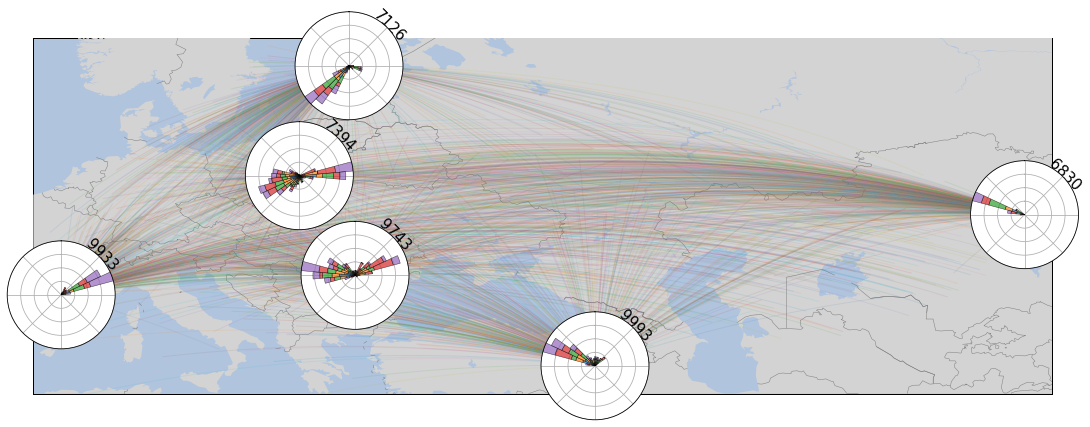

In [29]:
sample_locations = np.array(x0s)
labels = [accession[keep[ix]] for ix in ixs]
fname = plotdir + '1001G_windrose_admixed_weighted.pdf'

plot_windrose_map(sample_locations=sample_locations, labels=labels, all_bearings=bearings, all_weights=distances, mle_locations=all_mles, fname=fname)

try also without weighting histograms by distance

<ipython-input-189-02fb6aad1d97>:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


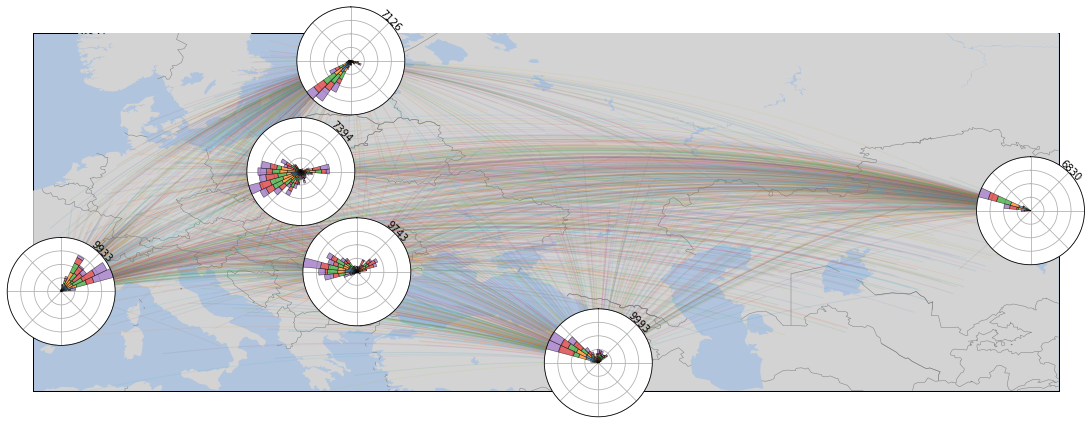

In [193]:
sample_locations = np.array(x0s)
labels = [accession[keep[ix]] for ix in ixs]
fname = plotdir + '1001G_windrose_admixed_unweighted.pdf'

plot_windrose_map(sample_locations=sample_locations, labels=labels, all_bearings=bearings, all_weights=[None] * len(ixs), mle_locations=all_mles, fname=fname)